#1)Скачайте текст произведения «Война и мир»: ссылка на [GitHub](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [Google Drive](https://drive.google.com/drive/u/0/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU).

In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
docs = ['tom_1.txt','tom_2.txt','tom_3.txt','tom_4.txt']

In [ ]:
text = ''

In [ ]:
# чтение файлов и объединение всех томов в один текст
for i in docs:
  with open(i, 'r') as f:
    text += f.read().lower()

## Очистите его, оставив только русские буквы и символы пробела.

In [ ]:
text = re.sub(r"[^а-яА-Я\s]", " ", text)
text = re.sub(r"[\n]", " ", text)
text = re.sub(r"[\s]+", " ", text)

In [ ]:
text[:500]

' лев толстой война и мир том том часть первая часть орая часть третья том лев николаевич толстой война и мир том часть первая е поместья мой верный раб ну что князь генуа и лукка стали не больше как поместьями фамилии бонапарте нет я вас предупреждаю если вы мне не скажете что у нас война если вы еще позволите себе защищать все гадости все ужасы этого антихриста право я верю что он антихрист я вас больше не знаю вы уж не друг мой вы уж не мой верный раб как вы говорите ну здравствуйте здравствуй'

## Постройте матрицу переходных вероятностей.

In [ ]:
alphabet = "абвгдеёжзийклмнопрстуфхцчшщъыьэюя "
POS = {l: i for i, l in enumerate(alphabet)}

In [ ]:
probabilities = np.zeros((len(alphabet), len(alphabet)))

In [ ]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [ ]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

<ipython-input-122-dc1e1f362eff>:1: RuntimeWarning: invalid value encountered in true_divide
  probabilities = (probabilities / probabilities.sum(axis=1)[:, None])


In [ ]:
probabilities

array([[7.96207927e-05, 8.60966172e-03, 4.65993959e-02, ...,
        1.08868164e-02, 3.41042395e-02, 2.42912422e-01],
       [6.52445734e-02, 6.00180054e-04, 5.37661298e-03, ...,
        2.75082525e-04, 2.92837851e-02, 1.64299290e-02],
       [1.38932474e-01, 3.38240959e-04, 8.36206816e-04, ...,
        9.39558220e-06, 5.18636137e-03, 1.64901863e-01],
       ...,
       [7.08466171e-05, 7.89231314e-02, 0.00000000e+00, ...,
        6.87212186e-03, 0.00000000e+00, 5.69181722e-01],
       [0.00000000e+00, 1.99474651e-03, 1.53062232e-02, ...,
        6.22123911e-03, 8.70973476e-03, 5.86494974e-01],
       [1.42448616e-02, 4.40427636e-02, 9.11639889e-02, ...,
        2.32168251e-04, 8.44735250e-03, 0.00000000e+00]])

In [ ]:
df = pd.DataFrame(probabilities, index=(c for c in alphabet), columns=(c for c in alphabet))

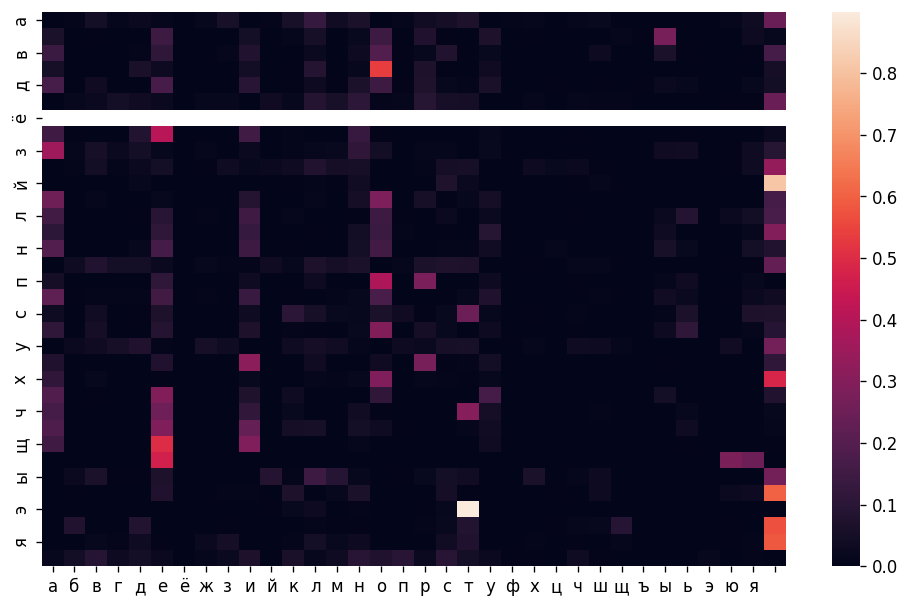

In [ ]:
plt.figure(figsize=(10,6), dpi= 120)
sns.heatmap(df)
plt.show()

## Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».

In [ ]:
start = POS['п']
end = POS['р']
prior = 1. / len(alphabet)
for c in alphabet:
    for c2 in alphabet:
        if c != ' ' and c2 != ' ':
            proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[c2]] * probabilities[POS[c2], end]
            if proba > 0:
                print(''.join(['п', c, c2, 'р']), proba)

паар 5.042601189831003e-09
пабр 9.945981195861123e-07
павр 1.1407262851322783e-06
пагр 1.2628385860977974e-06
падр 2.911723377433283e-06
паер 1.9417421495175095e-06
пажр 7.30499932557018e-09
пазр 1.2067019941744283e-06
паир 2.2403725017829062e-08
пайр 2.381148771960243e-08
пакр 4.796892489646744e-06
памр 9.93073538415115e-08
панр 1.1034641855247872e-07
паор 7.718256621510492e-09
папр 5.447661911021905e-06
парр 2.3004531145012285e-08
паср 4.985441215166441e-07
патр 5.469754748323081e-06
паур 6.600728309337737e-08
пафр 3.15449671708868e-06
пахр 2.394035775627826e-07
пачр 2.5346925733700718e-08
пашр 5.258396999672493e-09
пащр 4.5451641687422465e-09
паэр 8.506706869140792e-11
паюр 1.5911344050316622e-07
паяр 1.3895096288314731e-07
пгар 2.662983249093239e-08
пгвр 4.0809204003923635e-10
пггр 5.4016396945030564e-11
пгдр 5.122255072704546e-08
пгер 3.304350889732911e-08
пгжр 7.34992214502145e-14
пгзр 3.5840548277137035e-12
пгир 4.3942463079999584e-09
пгкр 2.8601447509306753e-09
пгмр 4.226477396

## Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.

In [ ]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(alphabet), p=probabilities[index])
    if next_char != " ":
        s.append(next_char)

print (''.join(s))

бытобышам


# 2) Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM

In [ ]:
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 8.8 MB/s eta 0:00:00


In [ ]:
from hmmlearn.hmm import GaussianHMM

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.gridspec import GridSpec
from scipy.stats import boxcox

In [ ]:
series = pd.read_csv('weekly-closings-of-the-dowjones-.csv')['Close']

In [ ]:
def Dickey_Fuller(y):
  """"Функция принимает на вход временной ряд
  и выводит на печать значения теста Дики-Фуллера 
  """
  result = adfuller(y)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    print()
  if result[1] > 0.05:
    print('Временной ряд не является стационарным')
  else:
    print('Стационарный временной ряд') 

In [ ]:
def grafs(series):
    """Функция для отображения графиков Time series, ACF, PACF """
    fig = plt.figure(figsize=(12, 8), dpi = 120)
    gs = GridSpec(2, 2, figure=fig)

    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(series, color='blue')
    ax1.set_title('Time series')
    ax1.set_facecolor('lightgray')
    ax1.grid(True)

    ax2 = fig.add_subplot(gs[1, 0])
    plot_acf(series, color='green',ax=ax2)
    ax2.set_title('Autocorrelation Function (ACF)')
    ax2.set_facecolor('lightyellow')
    ax2.grid(True)

    ax3 = fig.add_subplot(gs[1, 1])
    plot_pacf(series, color='red', ax=ax3)
    ax3.set_title('Partial Autocorrelation Function (PACF)')
    ax3.set_facecolor('lightblue')
    ax3.grid(True)

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


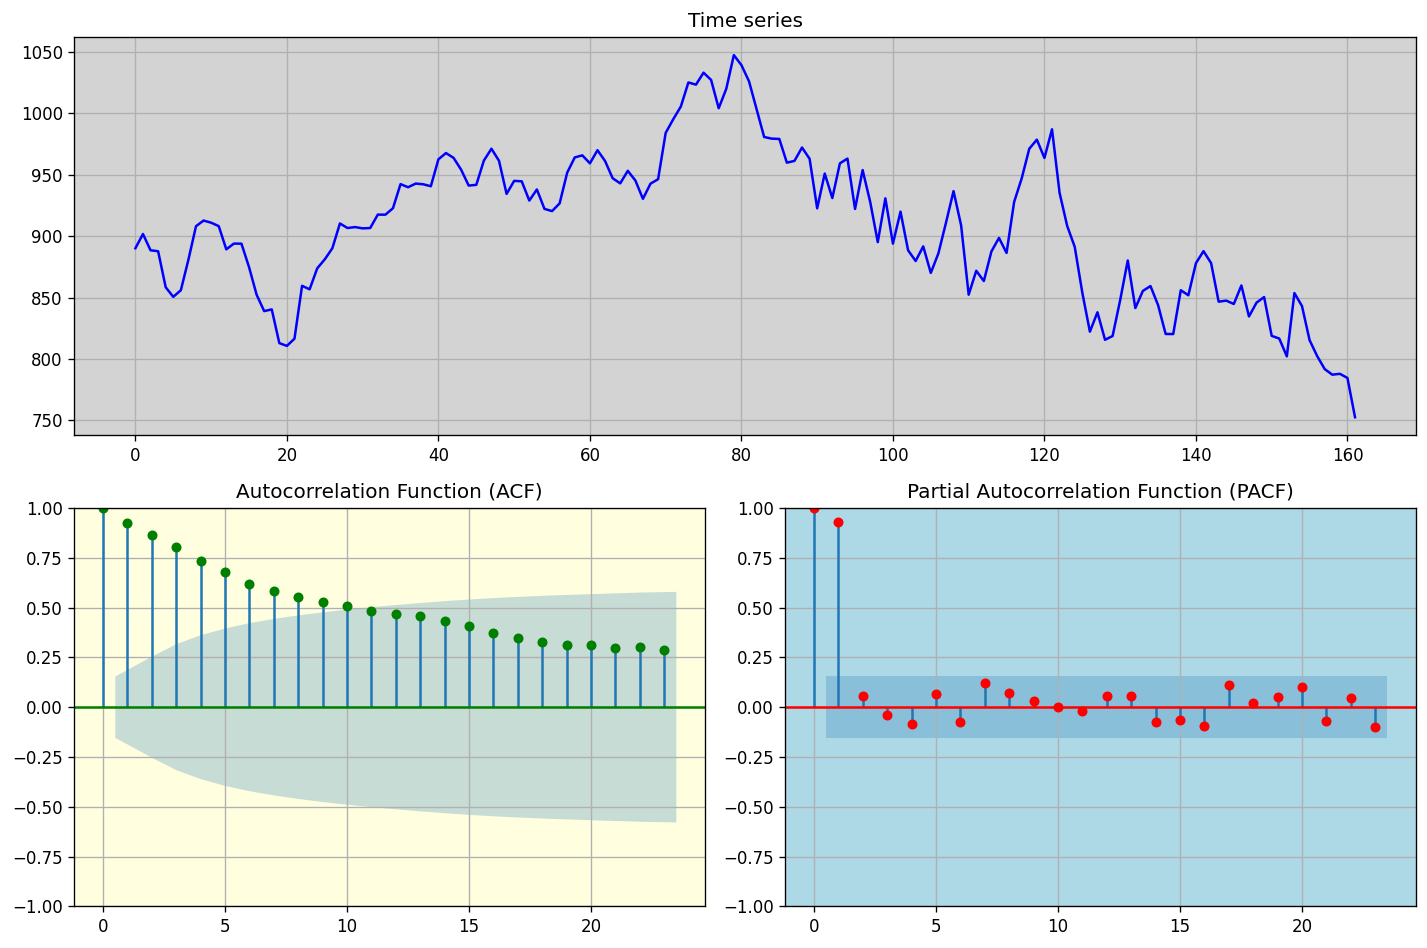

In [ ]:
grafs(series)

In [ ]:
Dickey_Fuller(series)

ADF Statistic: -1.314625
p-value: 0.622455
Critical Values:
	1%: -3.472

	5%: -2.880

	10%: -2.576

Временной ряд не является стационарным


**Делаем временной ряд стационарным**

In [ ]:
stat_series = boxcox(series, 1) # Убираем дисперсию

In [ ]:
stat_series = np.diff(stat_series, 1) # Убираем тренд

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


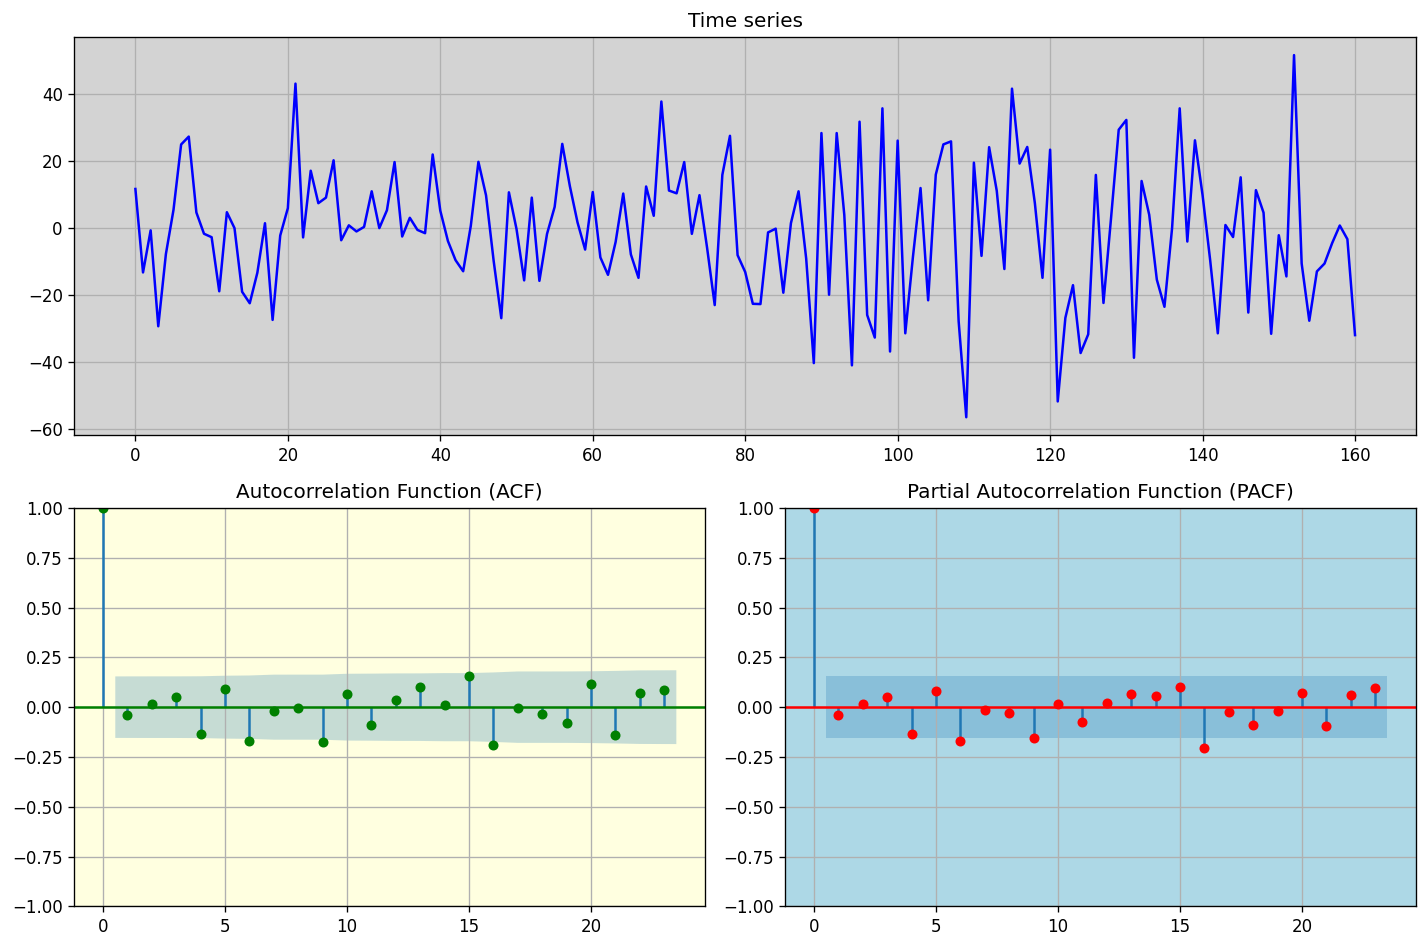

In [ ]:
grafs(stat_series)

In [ ]:
Dickey_Fuller(stat_series)

ADF Statistic: -13.025208
p-value: 0.000000
Critical Values:
	1%: -3.472

	5%: -2.880

	10%: -2.576

Стационарный временной ряд


In [ ]:
values = stat_series.reshape(-1,1)

In [ ]:
for n in range(1, 25):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -709.0736825855681
2 -708.6031350545161
3 -708.1115680148338
4 -691.1880395877062
5 -692.4875891987567
6 -691.8514579397868
7 -687.8943940948606
8 -679.1063153829546
9 -673.1453209814512
10 -674.277983435298


11 -671.3063747655631
12 -659.8294969616236


13 -650.7179968519063
14 -650.350076867569


15 -653.8563345491538
16 -623.0012830520891


17 -642.5760609030347
18 -641.71877234865
19 -627.6794233375635


20 -612.0124773042451
21 -626.5792141032774


22 -602.0771632194119


23 -622.0496935274138
24 -596.1269705380931


Метод score в GaussianHMM возвращает логарифм вероятности (log-likelihood) наблюдаемых данных, вычисленный с использованием модели скрытой марковской модели (Hidden Markov Model, HMM) с гауссовскими состояниями.Логарифм правдоподобия используется для измерения, насколько хорошо модель HMM соответствует данным. Чем ближе значение логарифма правдоподобия к нулю, тем лучше модель соответствует данным.

## Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

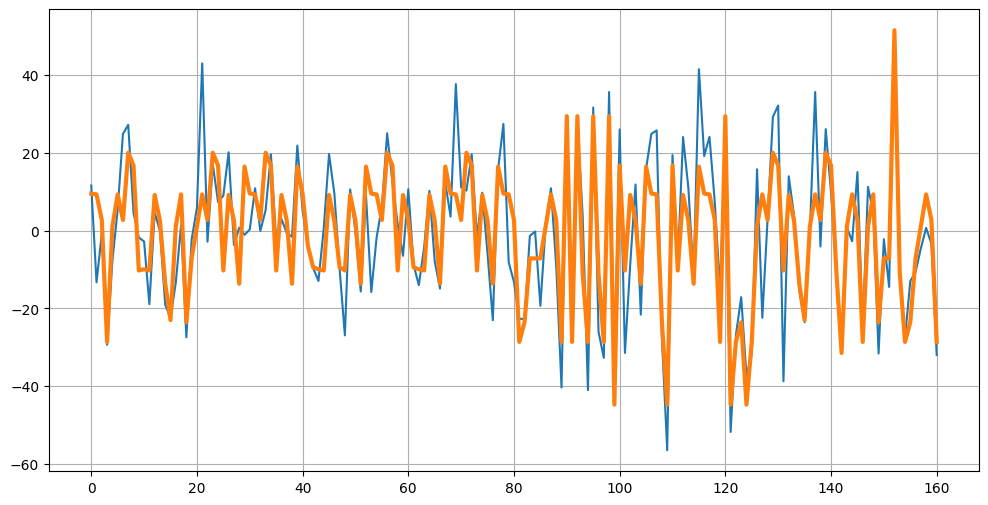

In [ ]:
model = GaussianHMM(n_components=24,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)
plt.grid()
plt.show()